In [31]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import matplotlib.dates as dates

import pandas_datareader.data as web

from mpl_finance import candlestick_ochl
import csv
from pandas import Series,DataFrame
from datetime import datetime
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY


%matplotlib inline


In [2]:
CSV_FILE_PATH_BABA = './BABA.csv'#定义阿里巴巴路径
CSV_FILE_PATH_top = './top5.csv'#定义风险分析路径

In [3]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')#定义时间格式
BABA_df = pd.read_csv(CSV_FILE_PATH_BABA,parse_dates=['Date'],date_parser=dateparse,index_col=0)#读取数据

In [4]:
BABA_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,212.000000,213.639999,210.729996,212.100006,212.100006,6773600
2020-01-02,216.600006,219.979996,216.539993,219.770004,219.770004,15873500
2020-01-03,216.350006,218.203003,216.009995,217.000000,217.000000,8604500
2020-01-06,214.889999,217.160004,214.089996,216.639999,216.639999,11885500
2020-01-07,217.639999,218.940002,216.690002,217.630005,217.630005,9388000


In [5]:
BABA_df.shape#查看数组维数

(113, 6)

In [6]:
BABA_df.info()#查看信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2019-12-31 to 2020-06-11
Data columns (total 6 columns):
Open         113 non-null float64
High         113 non-null float64
Low          113 non-null float64
Close        113 non-null float64
Adj Close    113 non-null float64
Volume       113 non-null int64
dtypes: float64(5), int64(1)
memory usage: 6.2 KB


In [7]:
BABA_df.describe()#生成描述性统计，总结数据集分布的中心趋势，分散和形状

,Open,High,Low,Close,Adj Close,Volume
count,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02
mean,207.010265,209.743248,204.104513,207.092124,207.092124,1.819595e+07
std,12.695443,11.712346,12.919290,12.354274,12.354274,6.590369e+06
min,175.270004,178.500000,169.949997,176.339996,176.339996,6.773600e+06
25%,198.979996,201.770004,196.110001,199.440002,199.440002,1.360800e+07
50%,207.550003,209.970001,204.100006,207.410004,207.410004,1.742030e+07
75%,217.460007,219.979996,215.190002,217.210007,217.210007,2.081380e+07
max,230.050003,231.139999,227.039993,230.479996,230.479996,5.197930e+07


In [8]:
#

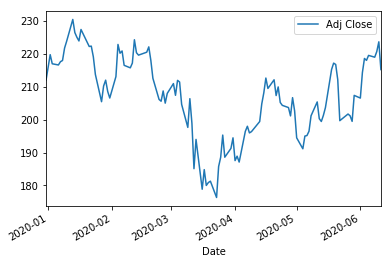

In [9]:
BABA_df["Adj Close"].plot(kind="line",legend=True)#阿里巴巴股票每月收盘价格走势分析

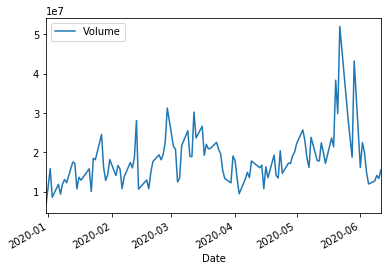

In [10]:
BABA_df["Volume"].plot(kind="line",legend=True)#阿里巴巴股票每月股票交易量走势分析：

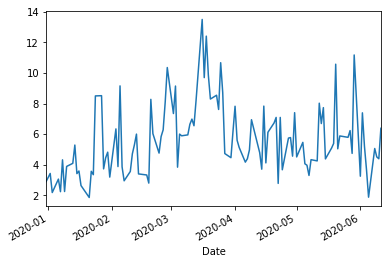

In [11]:
BABA_df["high-low"]=BABA_df["High"]-BABA_df["Low"]
BABA_df["high-low"].plot()
#阿里巴巴股票日均（股票每月最高价格-股票每日最低价格）变化走势分析：

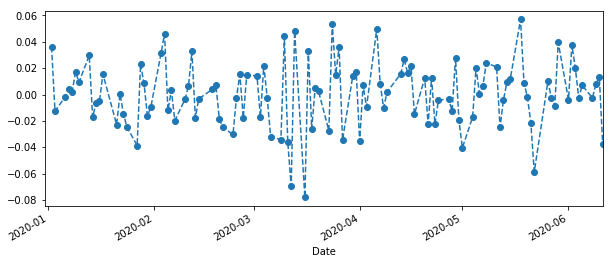

In [12]:
BABA_df["daily-return"] = BABA_df["Adj Close"].pct_change()
BABA_df["daily-return"].plot(figsize=(10,4),linestyle="--",marker="o")
#阿里巴巴股票每日收盘价 天与天 之间股票变化分析

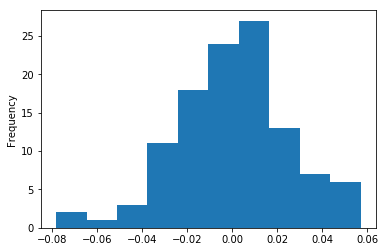

In [13]:
BABA_df["daily-return"].plot(kind='hist')
#阿里巴巴股票每日收盘价 天与天 之间股票变化分析（直方图）

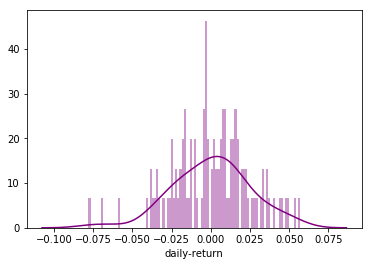

In [14]:
sns.distplot(BABA_df["daily-return"].dropna(),bins=100,color="purple")
plt.show()
#阿里巴巴股票每日收盘价 天与天 之间股票变化分析sns展示图像：

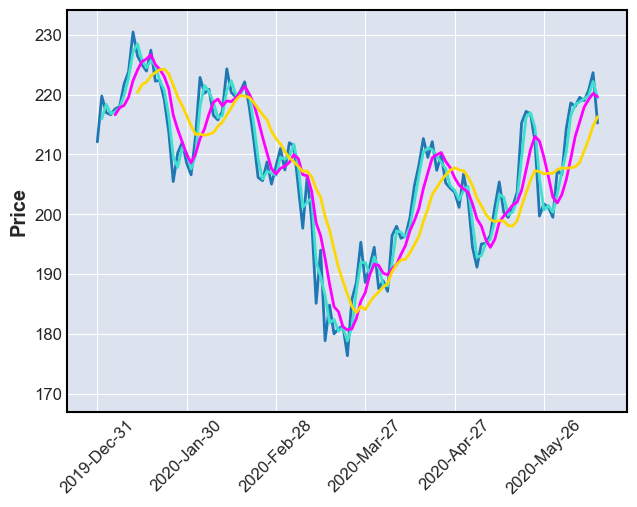

In [15]:
mpf.plot(BABA_df,type='line', mav=(2, 5, 10))

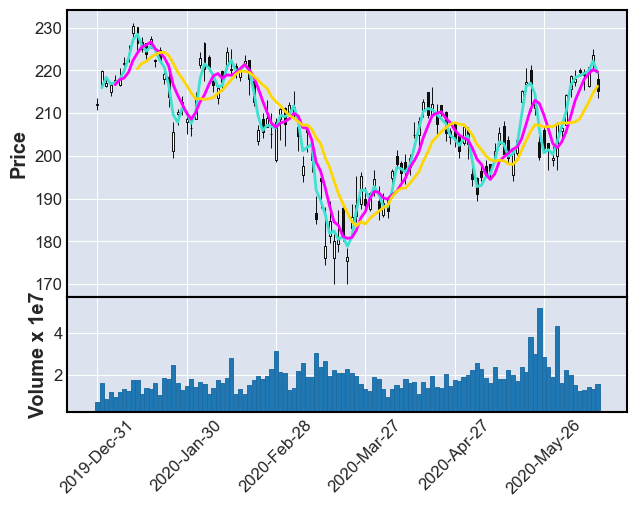

In [16]:
mpf.plot(BABA_df, type='candle', mav=(2, 5, 10), volume=True)#绘制均线和成交量

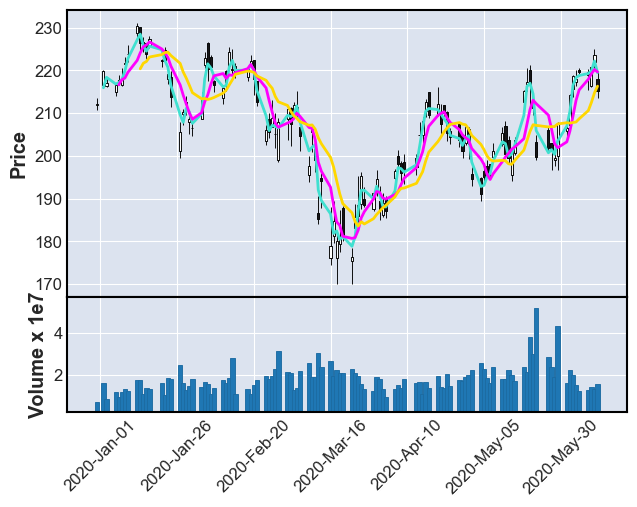

In [17]:
# 显示非交易时间的空白
mpf.plot(BABA_df,type='candle',mav=(2, 5, 10), volume=True,show_nontrading=True)

In [39]:


def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(dates.date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 

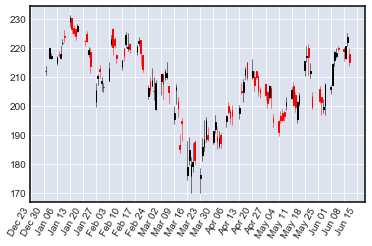

In [40]:
pandas_candlestick_ohlc(BABA_df)

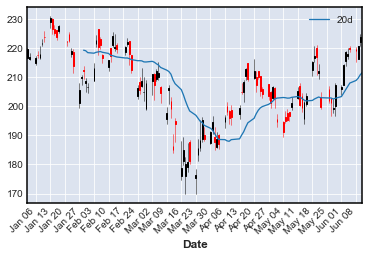

In [38]:
#移动平均值分析
BABA_df["20d"] = np.round(BABA_df["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(BABA_df.loc['2020-01-01':'2020-06-11',:], otherseries = "20d")

In [ ]:
#风险分析

In [ ]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')#定义时间格式
top_df = pd.read_csv(CSV_FILE_PATH_top,parse_dates=['Date'],date_parser=dateparse,index_col=0)#读取数据
top_df.head()#抓取数据前五条

In [ ]:
#数据处理
top_dr=top_df.pct_change()
top_dr.head()

In [ ]:
top_df.describe()#生成描述性统计，总结数据集分布的中心趋势，分散和形状

In [ ]:
top_df.plot()

In [ ]:
sns.jointplot("AMZN","GOOG",top_dr,kind="scatter")#两个数据的对比
plt.show()
#对两只股票进行散点图的分析

In [ ]:
sns.pairplot(top_dr.dropna())
plt.show()
#对多个数据进行散点图分析

In [ ]:
print(top_dr["MSFT"].quantile(0.05))#即95%的概率，最大亏损在4.6个点以内

In [ ]:
print(top_dr["AAPL"].quantile(0.05))#百分之95的概率，最大亏损在5.0个点以内

In [ ]:
print(top_dr["FB"].quantile(0.05))#百分之95的概率，最大亏损在4.8个点以内

In [ ]:
print(top_dr["AMZN"].quantile(0.05))#百分之95的概率，最大亏损在3.9个点以内

In [ ]:
print(top_dr["GOOG"].quantile(0.05))#百分之95的概率，最大亏损在4.8个点以内